In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data1 = pd.read_csv('/Users/jessicagale/project-group37-project/data/raw/Batting.csv')
data1.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [4]:
data1_clean = (
data1
    .dropna(axis=0)
    .sort_values(by = 'yearID', ascending = True)
)
data1_clean.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
12629,aitchra01,1911,1,BRO,NL,1,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
12700,camniha01,1911,1,SLN,NL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
12738,cottren01,1911,1,PIT,NL,1,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
12830,griffha01,1911,1,CHN,NL,1,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
13045,pucketr01,1911,1,PHI,NL,1,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
HallofFame = pd.read_csv('data/raw/HallOfFame.csv')
HallofFame

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN
...,...,...,...,...,...,...,...,...,...
4186,lidgebr01,2018,BBWAA,422.0,317.0,0.0,N,Player,NaN
4187,millwke01,2018,BBWAA,422.0,317.0,0.0,N,Player,NaN
4188,zambrca01,2018,BBWAA,422.0,317.0,0.0,N,Player,NaN
4189,morrija02,2018,Veterans,NaN,NaN,NaN,Y,Player,NaN


In [7]:
HallofFame_clean = (
HallofFame
    .drop(['votedBy','needed_note','category'],axis=1)
    .dropna(axis = 0)
)
HallofFame_clean

,playerID,yearID,ballots,needed,votes,inducted
0,cobbty01,1936,226.0,170.0,222.0,Y
1,ruthba01,1936,226.0,170.0,215.0,Y
2,wagneho01,1936,226.0,170.0,215.0,Y
3,mathech01,1936,226.0,170.0,205.0,Y
4,johnswa01,1936,226.0,170.0,189.0,Y
...,...,...,...,...,...,...
4184,huffau01,2018,422.0,317.0,0.0,N
4185,isrinja01,2018,422.0,317.0,0.0,N
4186,lidgebr01,2018,422.0,317.0,0.0,N
4187,millwke01,2018,422.0,317.0,0.0,N


In [8]:
merged = data1_clean.merge(HallofFame_clean, on="playerID", how="outer")
merged.head()

,playerID,yearID_x,stint,teamID,lgID,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,yearID_y,ballots,needed,votes,inducted
0,aitchra01,1911.0,1.0,BRO,NL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,camniha01,1911.0,1.0,SLN,NL,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,cottren01,1911.0,1.0,PIT,NL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,cottren01,1914.0,1.0,BSN,NL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,griffha01,1911.0,1.0,CHN,NL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [9]:
merged_clean = (
merged
    .dropna(axis=0)
)
merged_clean.head()

,playerID,yearID_x,stint,teamID,lgID,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,yearID_y,ballots,needed,votes,inducted
7,smithsh01,1911.0,1.0,PIT,NL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1948.0,121.0,91.0,1.0,N
8,smithsh01,1912.0,1.0,PIT,NL,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1948.0,121.0,91.0,1.0,N
19,doakbi01,1912.0,1.0,CIN,NL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1958.0,266.0,200.0,3.0,N
51,altroni01,1914.0,1.0,WS1,AL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1937.0,201.0,151.0,3.0,N
52,altroni01,1914.0,1.0,WS1,AL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1938.0,262.0,197.0,7.0,N


In [15]:
labels = ['BRO','SLN','PIT','BSN','CHN','CIN','WS1','TEX','NYA']
new_df = merged_clean.loc[merged_clean['teamID'].isin(['BRO','SLN','PIT','BSN','CHN','CIN','WS1','TEX','NYA'])]
new_df.head()

,playerID,yearID_x,stint,teamID,lgID,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,yearID_y,ballots,needed,votes,inducted
7,smithsh01,1911.0,1.0,PIT,NL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1948.0,121.0,91.0,1.0,N
8,smithsh01,1912.0,1.0,PIT,NL,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1948.0,121.0,91.0,1.0,N
19,doakbi01,1912.0,1.0,CIN,NL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1958.0,266.0,200.0,3.0,N
51,altroni01,1914.0,1.0,WS1,AL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1937.0,201.0,151.0,3.0,N
52,altroni01,1914.0,1.0,WS1,AL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1938.0,262.0,197.0,7.0,N


In [13]:
merged_clean['teamID'].value_counts()

NYA    2193
SLN    1686
LAN    1660
DET    1469
PIT    1463
CIN    1408
CHN    1385
CHA    1364
BOS    1317
PHI    1134
SFN    1046
CLE     999
MIN     966
ATL     910
BAL     903
NYN     856
HOU     763
MON     727
OAK     666
CAL     634
ML1     561
SDN     504
TEX     482
KCA     415
TOR     355
SEA     344
BRO     273
ML4     262
KC1     190
COL     159
FLO     155
WS1     120
NY1     110
ARI     102
WS2      98
TBA      85
ANA      75
LAA      48
MIL      42
WAS      14
BSN      11
SE1       9
MIA       2
SLA       1
Name: teamID, dtype: int64

In [14]:
merged_clean['teamID'].unique()

array(['PIT', 'CIN', 'WS1', 'CHA', 'NYA', 'NY1', 'SLA', 'CHN', 'SLN',
       'BSN', 'CLE', 'BRO', 'DET', 'KC1', 'ML1', 'PHI', 'CAL', 'BOS',
       'MIN', 'WS2', 'LAN', 'BAL', 'SFN', 'LAA', 'HOU', 'SDN', 'ATL',
       'NYN', 'KCA', 'MON', 'ML4', 'OAK', 'TOR', 'TEX', 'SE1', 'SEA',
       'FLO', 'COL', 'ANA', 'TBA', 'MIL', 'ARI', 'WAS', 'MIA'],
      dtype=object)

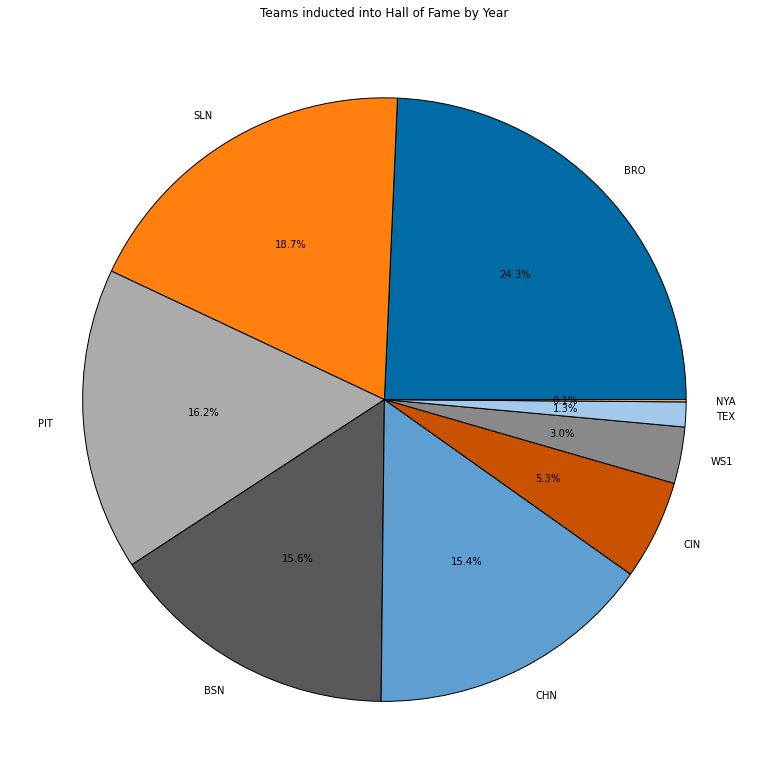

In [16]:
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(11,11))
plt.pie(list(new_df['teamID'].value_counts()), autopct='%1.1f%%',labels = labels, wedgeprops={'edgecolor':'black'})
plt.title('Teams inducted into Hall of Fame by Year')
plt.tight_layout()
plt.show()